# Volume 3: Pandas IV (Time Series).
    <Name>
    <Class>
    <Date>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
%matplotlib inline

# Matplotlib customizations.
# plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1
The file `DJIA.csv` contains daily closing values of the Dow Jones Industrial Average from 2006–2016.
Read the data into a `Series` or `DataFrame` with a `DatetimeIndex` as the index.
Drop rows with missing values, cast the `"VALUES"` column to floats, then plot the data.

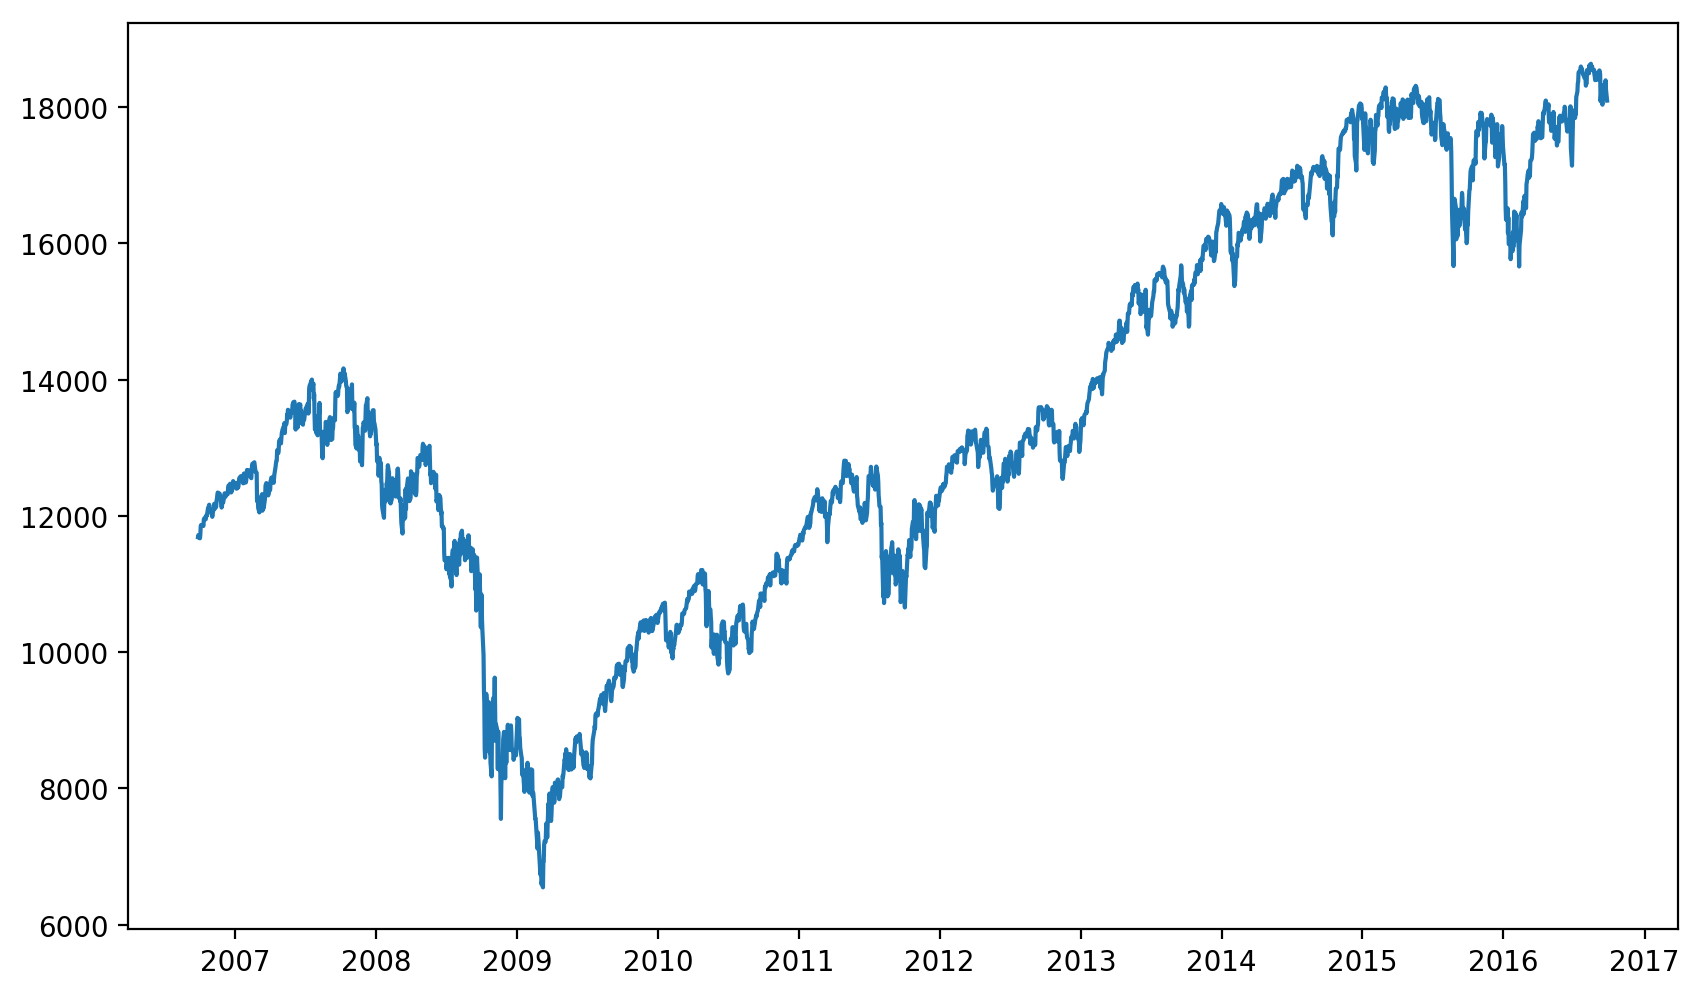

In [16]:
data = pd.read_csv('./DJIA.csv')
data = data[data['VALUE'] != '.']
obj = pd.Series(list(data['VALUE']), index=pd.to_datetime(data['DATE']))
obj = pd.to_numeric(obj)
plt.plot(obj)
plt.show()

## Problem 2

The file `paychecks.csv` contains values of an hourly employee's last 93 paychecks.
He started working March 13, 2008.
This company hands out paychecks on the first and third Fridays of the month.
Read in the data, using `pd.date_range()` to generate the DatetimeIndex.
Plot the data.

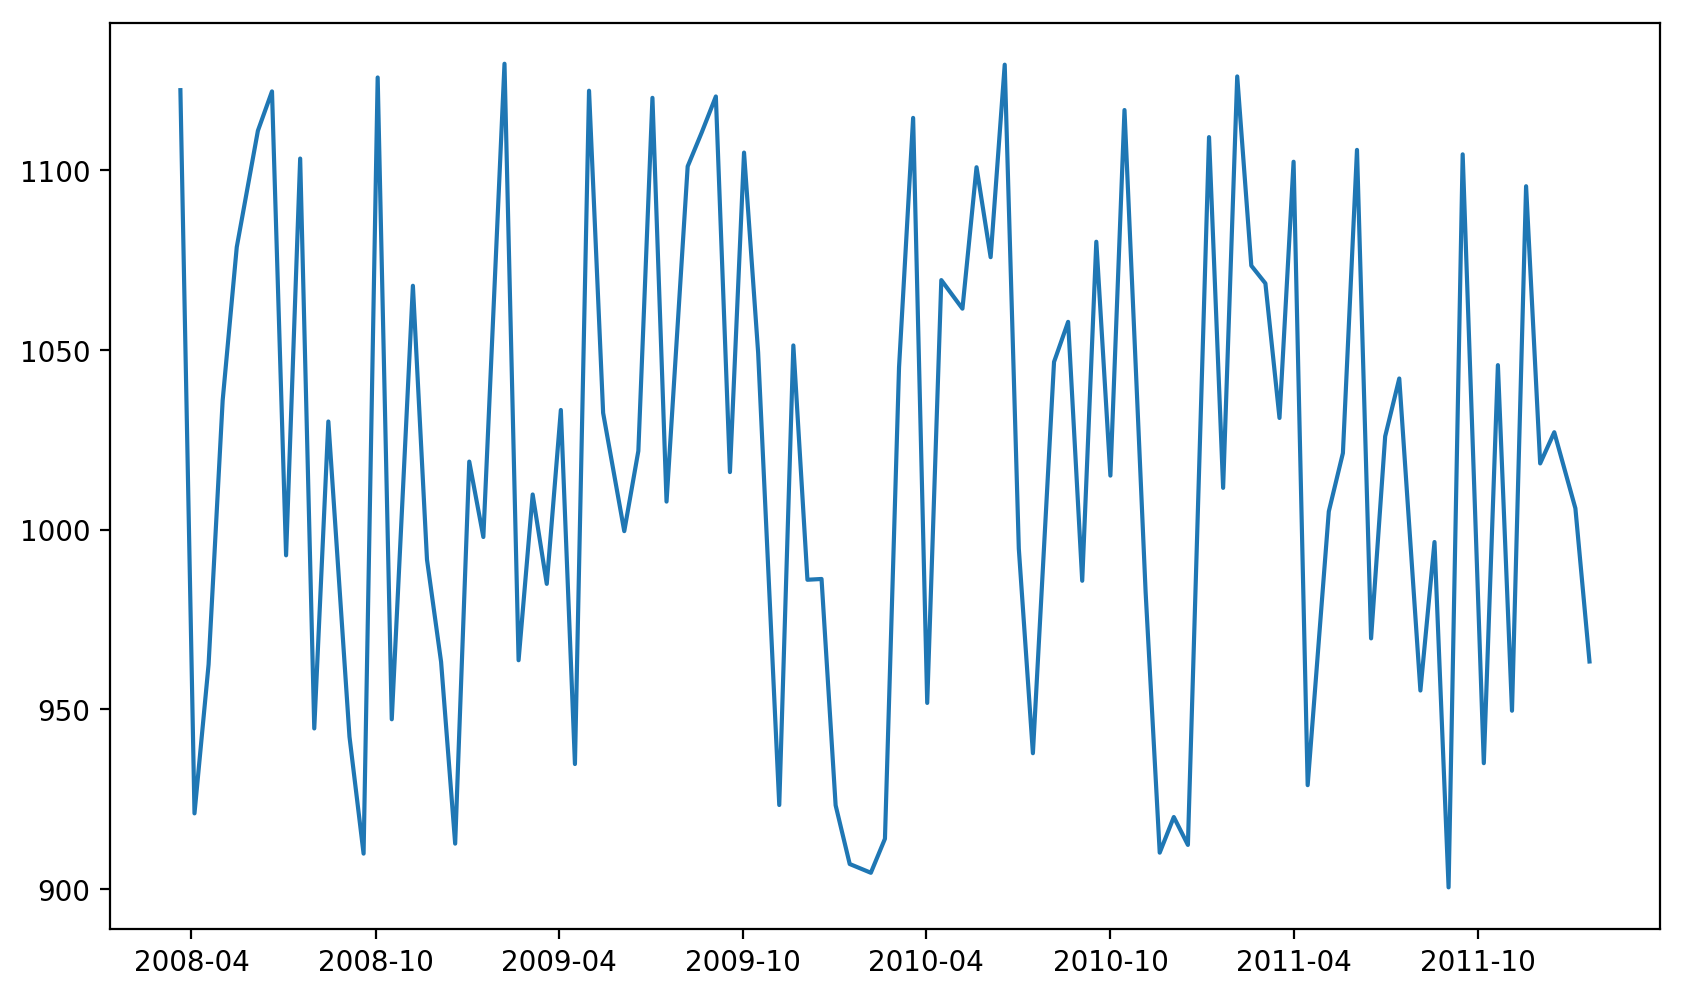

In [49]:
start = '2008-03-13'
dates = pd.date_range(start=start, periods=202, freq='W-FRI')
first_and_third = []
for date in dates :
    day = int(str(date)[8:10])
    if day < 8 or (day < 22 and day > 14) :
        first_and_third.append(date)
paychecks = pd.read_csv('./paychecks.csv',header=None)
values = pd.Series(list(paychecks[paychecks.columns[0]]), index=pd.to_datetime(first_and_third))
plt.plot(values)
plt.show()

## Problem 3

The file `finances.csv` contains a list of simulated quarterly earnings and expense totals from a fictional company.
Load the data into a `Series` or `DataFrame` with a `PeriodIndex` with a quarterly frequency.
Assume the fiscal year starts at the beginning of September and that the data begins in September 1978.
Plot the data.

## Problem 4

The file `website_traffic.csv` contains records for different visits to a fictitious website.
Read in the data, calculate the duration of each visit (in seconds), and convert the index to a `DatetimeIndex`.
Use downsampling to calculate the average visit duration by minute, and the average visit duration by hour.
Plot both results on the same graph.

## Problem 5
Compute the following information about the DJIA dataset from Problem 1.
- The single day with the largest gain.
- The single day with the largest loss.
- The month with the largest gain.
- The month with the largest loss.

For the monthly statistics, define the gain (or loss) to be the difference between the DJIA on the last and first days of the month.

## Problem 6

Plot the following from the DJIA dataset with a window or span of 30, 120, and 365.
- The original data points.
- Rolling average.
- Exponential average.
- Minimum rolling values.
- Maximum rolling values.

Describe how varying the length of the window changes the approximation to the data.